# Práctica de LDA, Conglomerados y Árboles

In [ ]:
### Carga de librerías

In [3]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

#Arboles
from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

import pandas.util.testing as tm

### LDA

Datos de COVID

In [4]:
#Carga de datos
filename = 'C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque2  Limpieza de Datos y Análisis Descriptivo Univariado/dfCovidPositivos.csv'
df = pd.read_csv(filename, header=0)

In [5]:
feature_cols = ['EDAD', 'SEXO','HOSPITALIZADO','UCI','dias_sintomas_ingreso']
X = df[feature_cols].values # Features
y = df.Muerto # Target variable

In [6]:
#X = df[['balance', 'income', 'student2']]
#y = df.default2

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,2995795,22163
Yes,305484,249602


In [7]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.99      0.91      0.95   3301279
         Yes       0.45      0.92      0.60    271765

    accuracy                           0.91   3573044
   macro avg       0.72      0.91      0.78   3573044
weighted avg       0.95      0.91      0.92   3573044



Quadratic Discriminant Analysis

In [8]:
# split X and y into training and testing sets
#Ojo, este lo tuve que cambiar del original, en lugar de model_selection decía cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [10]:
qda.priors_

array([0.92402109, 0.07597891])

In [11]:
qda.means_

array([[3.96385188e+01, 4.89503977e-01, 9.54701927e-02, 5.83964952e-03,
        3.63322034e+00],
       [6.28938740e+01, 6.19772405e-01, 9.21756128e-01, 9.07679991e-02,
        5.38815463e+00]])

In [12]:
confusion_matrix(y_test, pred).T
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.990     0.919     0.953    825103
           1      0.477     0.889     0.620     68158

    accuracy                          0.917    893261
   macro avg      0.733     0.904     0.787    893261
weighted avg      0.951     0.917     0.928    893261



### Árboles de Clasificación

In [13]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydotplus
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

from sklearn import tree

%matplotlib inline
plt.style.use('seaborn-white')

import pandas.util.testing as tm

In [14]:

df.Muerto

0          0
1          1
2          0
3          0
4          0
          ..
3573039    0
3573040    0
3573041    0
3573042    0
3573043    0
Name: Muerto, Length: 3573044, dtype: int64

In [15]:
df.columns

Index(['Muerto', 'EDAD', 'catEdad', 'SEXO', 'COMORBILIDADES', 'numComorb',
       'HOSPITALIZADO', 'UCI', 'INTUBADO', 'dias_sintomas_ingreso',
       'dias_ingreso_muerte', 'FECHA_INGRESO'],
      dtype='object')

In [16]:
#X2 = df.drop(['Muerto','catEdad','COMORBILIDADES','dias_ingreso_muerte','FECHA_INGRESO'], axis=1)
X2=df[['EDAD','SEXO','numComorb','dias_sintomas_ingreso','HOSPITALIZADO', 'UCI', 'INTUBADO']]
y2 = df.Muerto

In [23]:
#help(DecisionTreeClassifier)

In [34]:
clf = DecisionTreeClassifier(max_depth=None, 
                             max_leaf_nodes=8, 
                             max_features=4,
                             class_weight={1:11.5}
                            )
clf.fit(X2,y2)

#Para el balanceo por tener muy pocos casos de un tipo, ver:
#https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

DecisionTreeClassifier(class_weight={1: 11.5}, max_features=4, max_leaf_nodes=8)

In [35]:
clf.score(X2,y2)

0.912383670618106

Profundidad del árbol: 5
Número de nodos terminales: 8


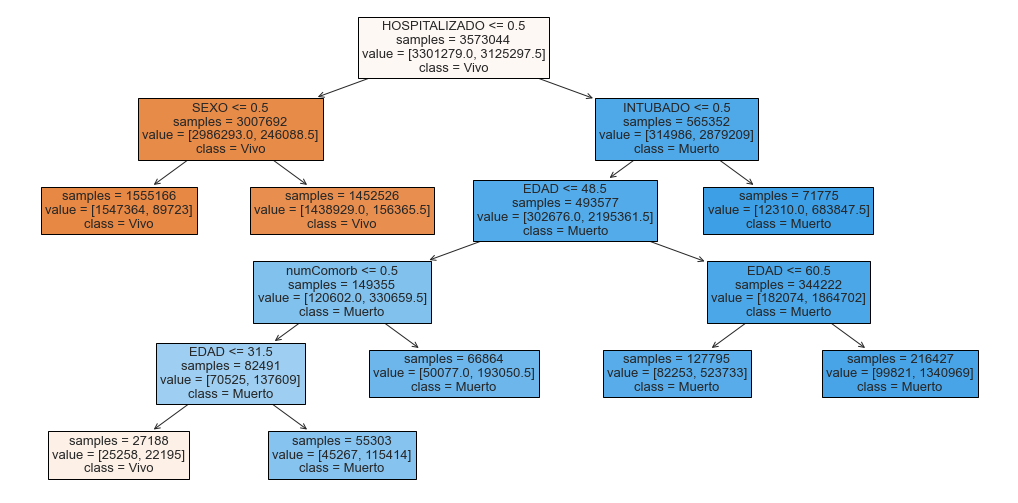

In [36]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 9))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X2.columns,
            class_names   = ['Vivo','Muerto'],
            filled        = True,
            impurity      = False,
            fontsize      = 13,
            precision     = 2,
            ax            = ax
       )

In [37]:
print(classification_report(y2, clf.predict(X2)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95   3301279
           1       0.46      0.91      0.61    271765

    accuracy                           0.91   3573044
   macro avg       0.73      0.91      0.78   3573044
weighted avg       0.95      0.91      0.92   3573044



In [38]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X2.columns,
                             'importancia': clf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,HOSPITALIZADO,0.977438
0,EDAD,0.014238
6,INTUBADO,0.005208
2,numComorb,0.001769
1,SEXO,0.001348
3,dias_sintomas_ingreso,0.000000
5,UCI,0.000000


In [39]:
#Análisis de conglomerados, replicar el ejemplo de datos del Senado para otro año que 
#no sea 2017 y comparar los resultados.

In [41]:
#Importar datos de Senado
# Carga de datos
df = pd.read_csv('https://github.com/claudianila/MiRepoCS/blob/main/Data/IDEFC_jun2021.csv?raw=true',encoding='ANSI')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        44352 non-null  int64 
 1   INEGI       44352 non-null  int64 
 2   ENTIDAD     44352 non-null  object
 3   MODALIDAD   44352 non-null  object
 4   TIPO        44352 non-null  object
 5   SUBTIPO     44352 non-null  object
 6   ENERO       44352 non-null  int64 
 7   FEBRERO     44352 non-null  int64 
 8   MARZO       44352 non-null  int64 
 9   ABRIL       44352 non-null  int64 
 10  MAYO        44352 non-null  int64 
 11  JUNIO       44352 non-null  int64 
 12  JULIO       44352 non-null  int64 
 13  AGOSTO      44352 non-null  int64 
 14  SEPTIEMBRE  44352 non-null  int64 
 15  OCTUBRE     44352 non-null  int64 
 16  NOVIEMBRE   44352 non-null  int64 
 17  DICIEMBRE   44352 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 6.1+ MB


In [42]:
df2=df.loc[df['YEAR']==2012]
df2=df2.copy()
df2.drop(['YEAR','INEGI'],axis='columns', inplace=True)
df3=df2.groupby(['ENTIDAD','MODALIDAD']).sum()
df3.index = df3.index.set_names(['ENTIDAD','MODALIDAD'])
df3.reset_index(inplace=True)
df3 = df3.reset_index()
df4=pd.melt(df3, id_vars=['ENTIDAD','MODALIDAD'], value_vars=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
                                                          'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
                                                          'DICIEMBRE'])
df4.drop('variable',axis='columns', inplace=True)
df5=df4.groupby(['ENTIDAD','MODALIDAD']).sum()
df5.index = df5.index.set_names(['ENTIDAD','MODALIDAD'])
df5.reset_index(inplace=True)
df6=df5.sort_values(by=['ENTIDAD']).pivot(index='ENTIDAD',columns='MODALIDAD',values='value')

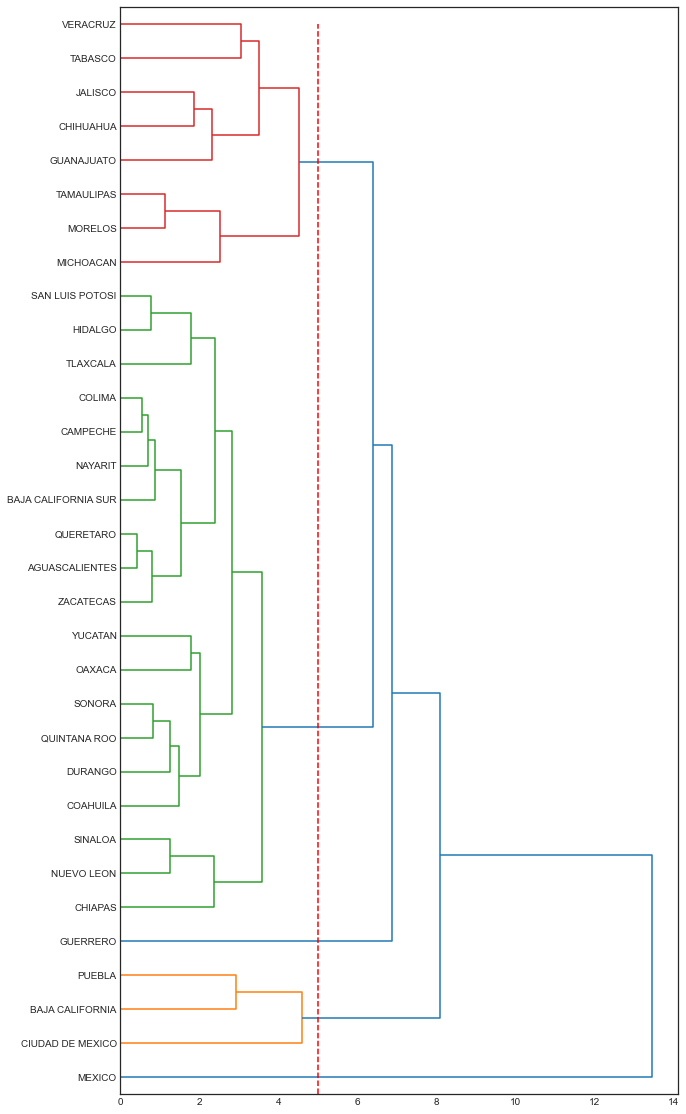

In [43]:
#Escalamiento
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale
X= pd.DataFrame(scale(df6), index=df6.index, columns=df6.columns)
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index, orientation='right', color_threshold=5, leaf_font_size=10)
#Traza la línea horizontal roja en el umbral de 5 (color_threshold)
plt.vlines(5,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

### Delitos
Ahora, agrupemos la matriz transpuesta que nos dará distancias entre delitos

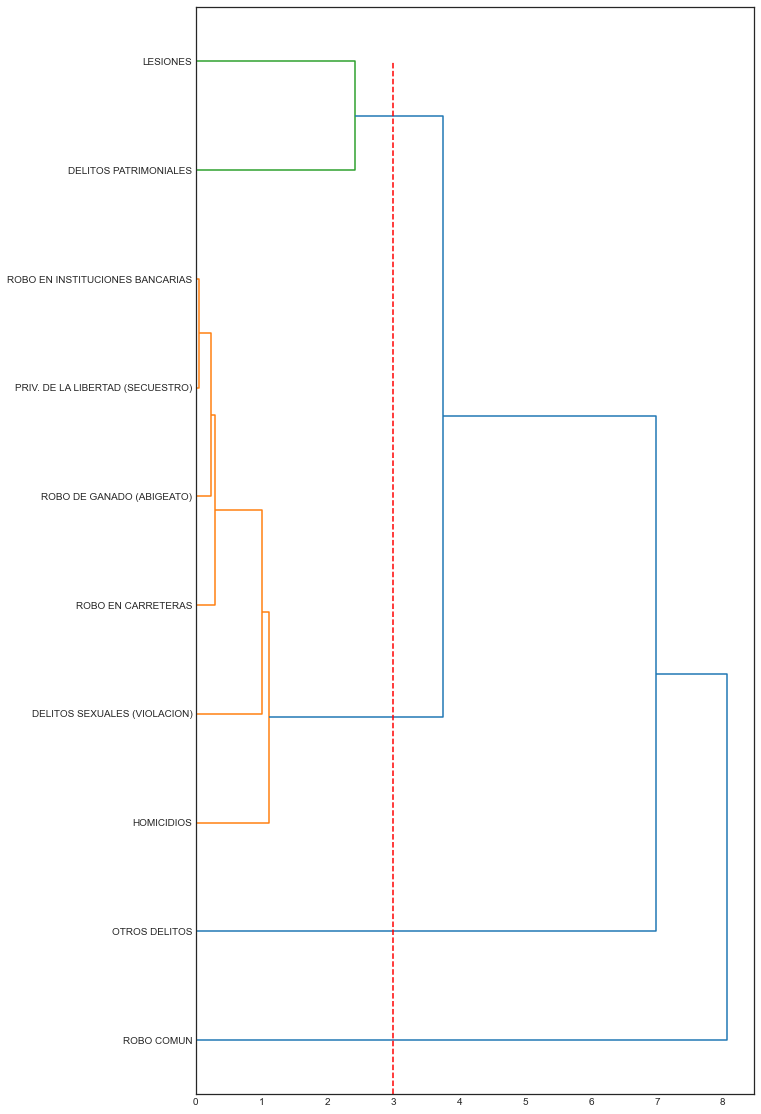

In [44]:
#Escalamiento
X= pd.DataFrame(scale(df6.T), index=df6.T.index, columns=df6.T.columns)
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.single(X),
                            labels=X.index, orientation='right', color_threshold=3, leaf_font_size=10)
#Traza la línea horizontal roja en el umbral de 5 (color_threshold)
plt.vlines(3,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');